### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
import matplotlib.pyplot as plt

# Calculamos la facturación total de cada tienda sumando la columna 'Precio'
facturacion_tienda1 = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostramos los resultados
print('Facturación total por tienda:')
print(f'Tienda 1: ${facturacion_tienda1:,.0f}')
print(f'Tienda 2: ${facturacion_tienda2:,.0f}')
print(f'Tienda 3: ${facturacion_tienda3:,.0f}')
print(f'Tienda 4: ${facturacion_tienda4:,.0f}')


Facturación total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


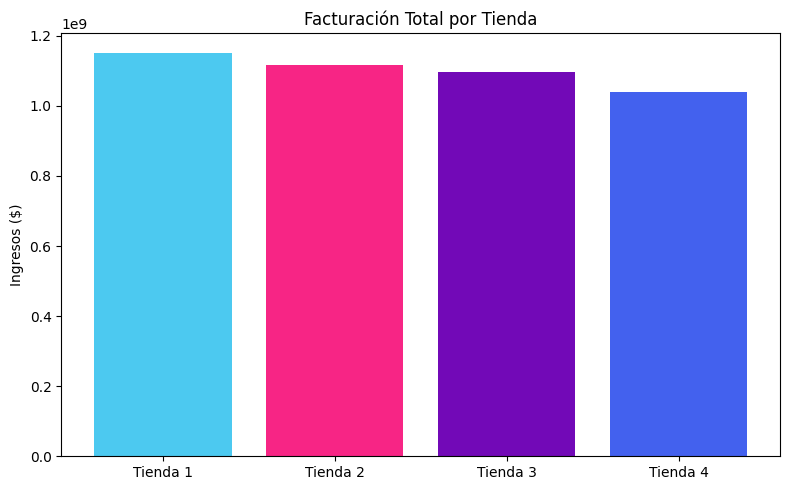

In [3]:
# Gráfico de barras con la facturación de cada tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

plt.figure(figsize=(8, 5))
plt.bar(tiendas, facturaciones, color=['#4cc9f0', '#f72585', '#7209b7', '#4361ee'])
plt.title('Facturación Total por Tienda')
plt.ylabel('Ingresos ($)')
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [4]:
# Contamos cuántas veces aparece cada categoría en cada tienda
categorias_t1 = tienda['Categoría del Producto'].value_counts()
categorias_t2 = tienda2['Categoría del Producto'].value_counts()
categorias_t3 = tienda3['Categoría del Producto'].value_counts()
categorias_t4 = tienda4['Categoría del Producto'].value_counts()

print('Categorías más vendidas - Tienda 1:')
print(categorias_t1)
print()
print('Categorías más vendidas - Tienda 2:')
print(categorias_t2)
print()
print('Categorías más vendidas - Tienda 3:')
print(categorias_t3)
print()
print('Categorías más vendidas - Tienda 4:')
print(categorias_t4)


Categorías más vendidas - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Categorías más vendidas - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Categorías más vendidas - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

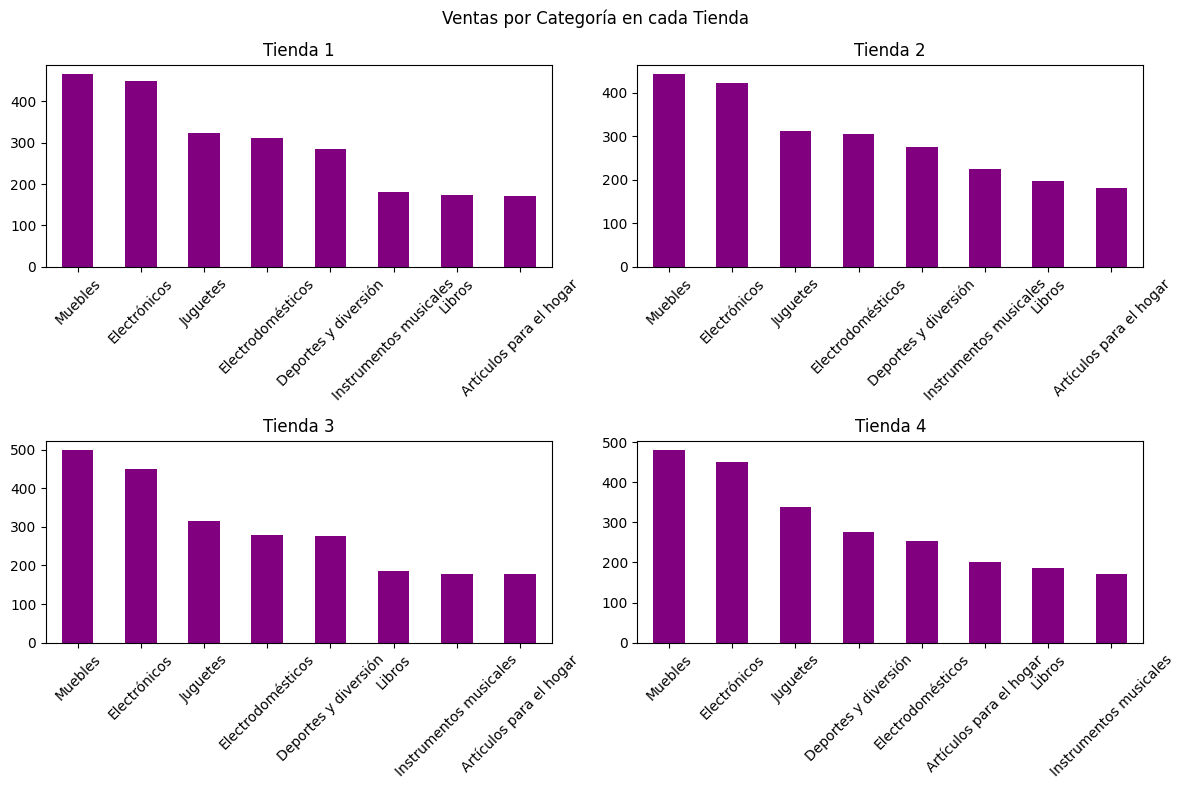

In [14]:
import matplotlib.pyplot as plt

# Gráfico: comparamos las categorías de las 4 tiendas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

categorias_t1.plot(kind='bar', ax=axes[0, 0], title='Tienda 1', color='purple')
categorias_t2.plot(kind='bar', ax=axes[0, 1], title='Tienda 2', color='purple')
categorias_t3.plot(kind='bar', ax=axes[1, 0], title='Tienda 3', color='purple')
categorias_t4.plot(kind='bar', ax=axes[1, 1], title='Tienda 4', color='purple')

for ax in axes.flatten():
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Ventas por Categoría en cada Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
# Calculamos el promedio de la columna 'Calificación' de cada tienda
calif_t1 = tienda['Calificación'].mean()
calif_t2 = tienda2['Calificación'].mean()
calif_t3 = tienda3['Calificación'].mean()
calif_t4 = tienda4['Calificación'].mean()

print('Calificación promedio por tienda:')
print(f'Tienda 1: {calif_t1:.2f}')
print(f'Tienda 2: {calif_t2:.2f}')
print(f'Tienda 3: {calif_t3:.2f}')
print(f'Tienda 4: {calif_t4:.2f}')


Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


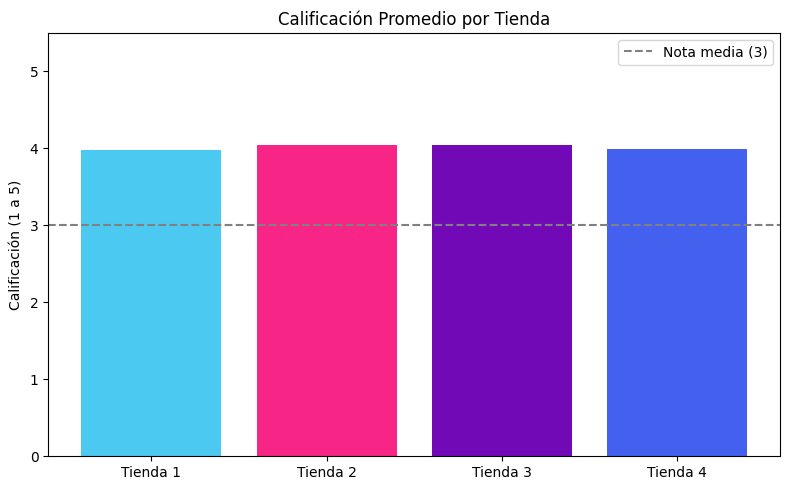

In [7]:
# Gráfico de barras con las calificaciones promedio
calificaciones = [calif_t1, calif_t2, calif_t3, calif_t4]

plt.figure(figsize=(8, 5))
plt.bar(tiendas, calificaciones, color=['#4cc9f0', '#f72585', '#7209b7', '#4361ee'])
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación (1 a 5)')
plt.ylim(0, 5.5)
plt.axhline(y=3, color='gray', linestyle='--', label='Nota media (3)')
plt.legend()
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [15]:
# Contamos cuántas veces se vendió cada producto en cada tienda
# .index[0] = el primero (más vendido) | .index[-1] = el último (menos vendido)

for nombre, df in [('Tienda 1', tienda), ('Tienda 2', tienda2), ('Tienda 3', tienda3), ('Tienda 4', tienda4)]:
    conteo = df['Producto'].value_counts()
    mas_vendido    = conteo.index[0]
    menos_vendido  = conteo.index[-1]
    print(f'{nombre}:')
    print(f'   Más vendido:   {mas_vendido} ({conteo.iloc[0]} unidades)')
    print(f'   Menos vendido: {menos_vendido} ({conteo.iloc[-1]} unidades)')
    print()


Tienda 1:
   Más vendido:   Microondas (60 unidades)
   Menos vendido: Celular ABXY (33 unidades)

Tienda 2:
   Más vendido:   Iniciando en programación (65 unidades)
   Menos vendido: Juego de mesa (32 unidades)

Tienda 3:
   Más vendido:   Kit de bancas (57 unidades)
   Menos vendido: Bloques de construcción (35 unidades)

Tienda 4:
   Más vendido:   Cama box (62 unidades)
   Menos vendido: Guitarra eléctrica (33 unidades)



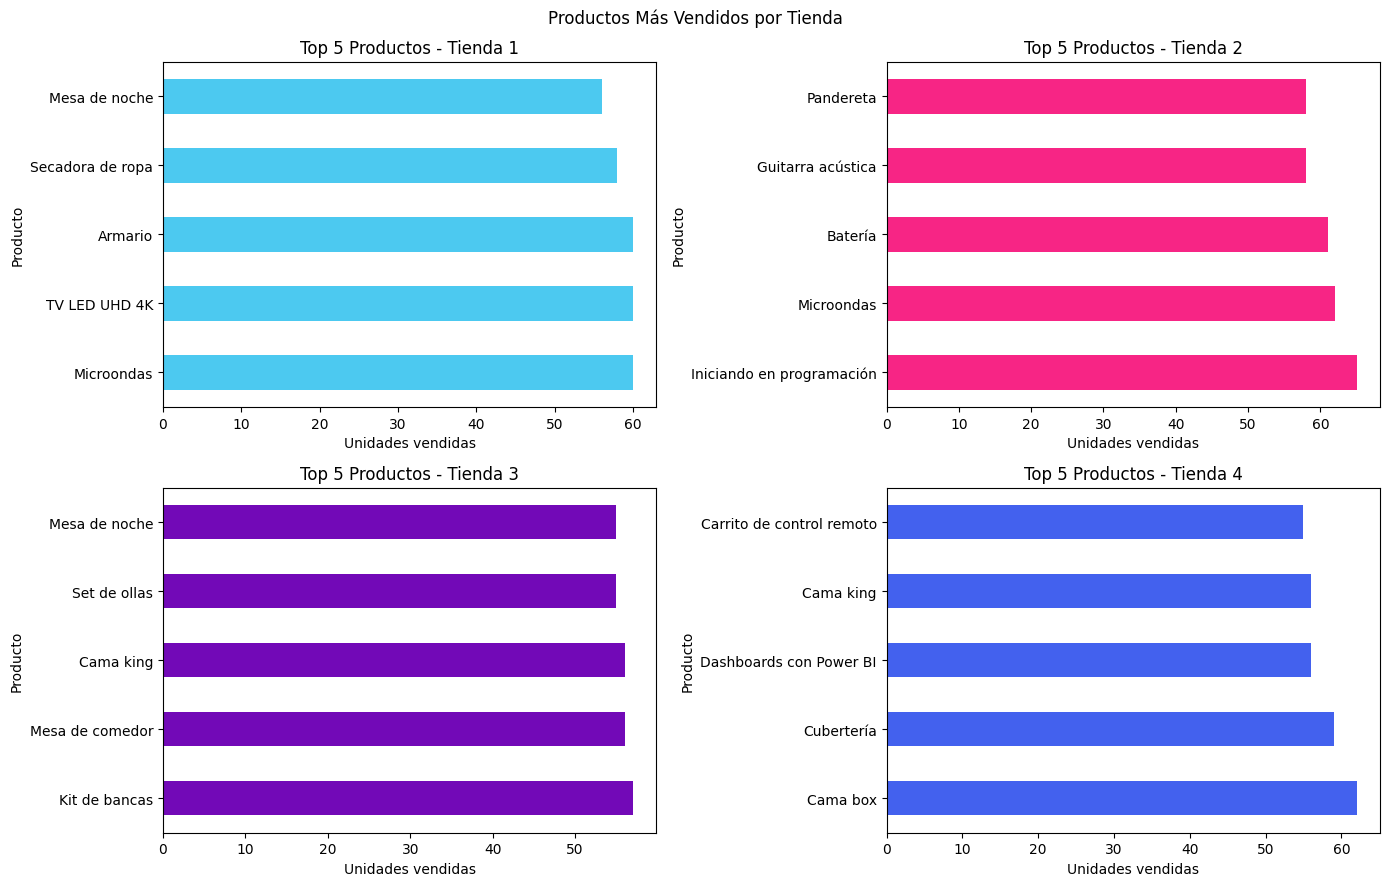

In [9]:
# Gráfico: top 5 productos más vendidos de cada tienda
fig, axes = plt.subplots(2, 2, figsize=(14, 9))

for ax, (nombre, df), color in zip(axes.flatten(),
    [('Tienda 1', tienda), ('Tienda 2', tienda2), ('Tienda 3', tienda3), ('Tienda 4', tienda4)],
    ['#4cc9f0', '#f72585', '#7209b7', '#4361ee']):

    top5 = df['Producto'].value_counts().head(5)
    top5.plot(kind='barh', ax=ax, color=color, title=f'Top 5 Productos - {nombre}')
    ax.set_xlabel('Unidades vendidas')

plt.suptitle('Productos Más Vendidos por Tienda')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [10]:
# Calculamos el costo de envío promedio de cada tienda
envio_t1 = tienda['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

print('Costo de envío promedio por tienda:')
print(f'Tienda 1: ${envio_t1:,.0f}')
print(f'Tienda 2: ${envio_t2:,.0f}')
print(f'Tienda 3: ${envio_t3:,.0f}')
print(f'Tienda 4: ${envio_t4:,.0f}')


Costo de envío promedio por tienda:
Tienda 1: $26,019
Tienda 2: $25,216
Tienda 3: $24,806
Tienda 4: $23,459


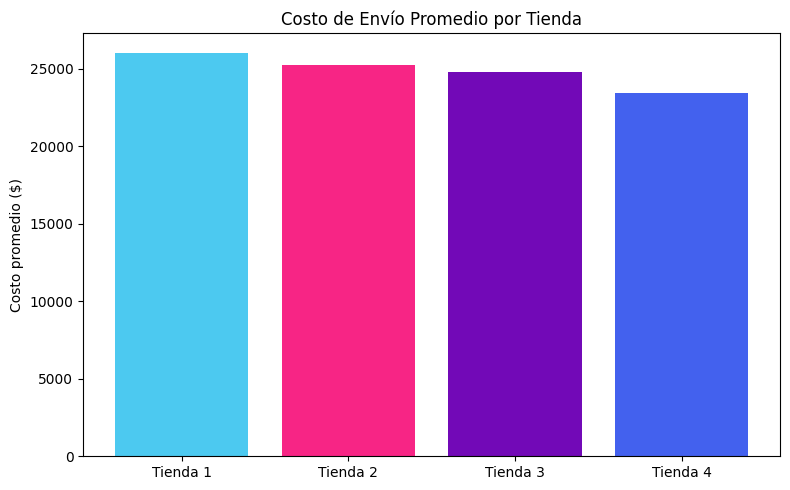

In [11]:
# Gráfico de barras con el costo de envío promedio
envios = [envio_t1, envio_t2, envio_t3, envio_t4]

plt.figure(figsize=(8, 5))
plt.bar(tiendas, envios, color=['#4cc9f0', '#f72585', '#7209b7', '#4361ee'])
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo promedio ($)')
plt.tight_layout()
plt.show()


---
# Final ¿Qué tienda debe vender el Sr. Juan?


In [17]:
# Resumen final con los 5 indicadores
resumen = {
    'Tienda'            : ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación ($)'   : [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4],
    'Calificación prom.': [calif_t1, calif_t2, calif_t3, calif_t4],
    'Costo envío ($)'   : [envio_t1, envio_t2, envio_t3, envio_t4],
}

df_resumen = pd.DataFrame(resumen)
df_resumen = df_resumen.sort_values('Facturación ($)', ascending=False).reset_index(drop=True)
print(df_resumen.to_string(index=False))
print()

# Identificamos la tienda con menor facturación
idx_peor = df_resumen['Facturación ($)'].idxmin()
tienda_vender = df_resumen.loc[idx_peor, 'Tienda']

print(f'Recomendación: El Sr. Juan debería vender la {tienda_vender},')
print(f'ya que es la que tiene la menor facturación total.')


  Tienda  Facturación ($)  Calificación prom.  Costo envío ($)
Tienda 1     1150880400.0            3.976685     26018.609580
Tienda 2     1116343500.0            4.037304     25216.235693
Tienda 3     1098019600.0            4.048326     24805.680373
Tienda 4     1038375700.0            3.995759     23459.457167

Recomendación: El Sr. Juan debería vender la Tienda 4,
ya que es la que tiene la menor facturación total.
